##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor


from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Pre-Processing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Nyc clustering project/nyc-rolling-sales.csv',header = 0)
df2 = pd.read_csv('/content/drive/MyDrive/Nyc clustering project/nyc-rolling-sales.csv',header = 0)

In [ ]:
del df['EASE-MENT']

df_info = [df['SALE DATE'],df['BLOCK'],df['LOT'],df['BOROUGH'],df['NEIGHBORHOOD'],df['BUILDING CLASS CATEGORY'], df['APARTMENT NUMBER'],df['ADDRESS'], df['ZIP CODE']]

In [ ]:
df_info = pd.DataFrame(df_info)

In [ ]:
df_info = df_info.T

In [ ]:
df_duplicate  = df.duplicated(df.columns)

In [ ]:
del df['Unnamed: 0']

In [ ]:

vals = [df.columns]
list = []
for i in vals:
    count = ((df[i]==' ').sum())
    list.append(count)

print(vals,':',list)

[Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS',
       'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASS AT TIME OF SALE', 'SALE PRICE', 'SALE DATE'],
      dtype='object')] : [BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GRO

In [ ]:
df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


###Calculating New feature "Building Age"

In [ ]:
df['BUILDING AGE'] = 2017 - df['YEAR BUILT']

In [ ]:
replaced = df['SALE PRICE'].replace(to_replace = '-', value = '?')

###Specifying categorical and numerical variables

In [ ]:
df.replace(' ',np.nan, inplace=True)

In [ ]:
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [ ]:
df.shape

(83783, 21)

In [ ]:
df.shape

(83783, 21)

In [ ]:
del df['YEAR BUILT']

In [ ]:
# Specifying numeric variables and correcting their types
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" ,
           "GROSS SQUARE FEET","SALE PRICE" ]
for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Specifying categorical variables and correcting their types
categorical = [ 'TAX CLASS AT PRESENT',
               'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical: 
    df[col] = df[col].astype(object)

In [ ]:
#Numerical Data Visualization

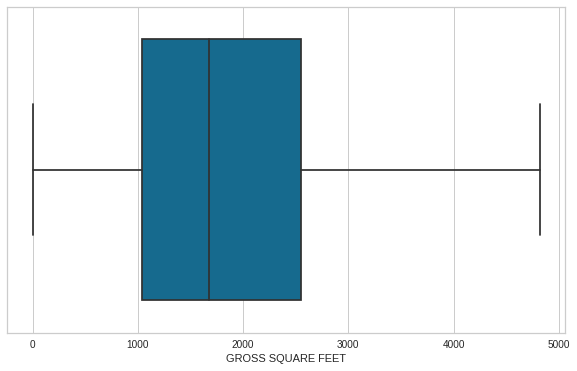

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='GROSS SQUARE FEET', data=df,showfliers=False)

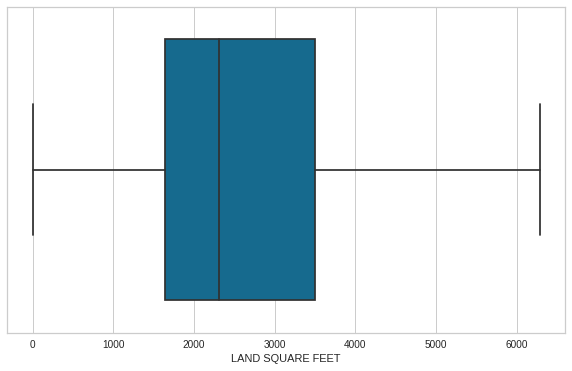

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LAND SQUARE FEET', data=df,showfliers=False)

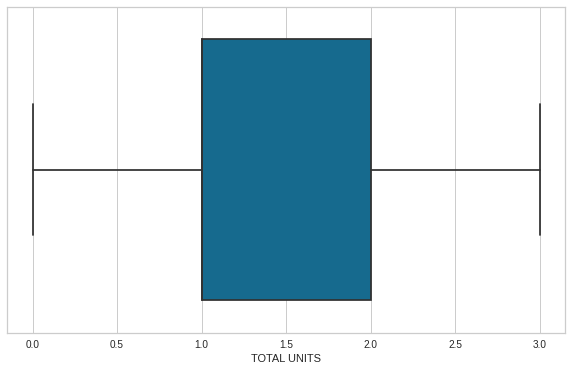

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TOTAL UNITS', data=df,showfliers=False)

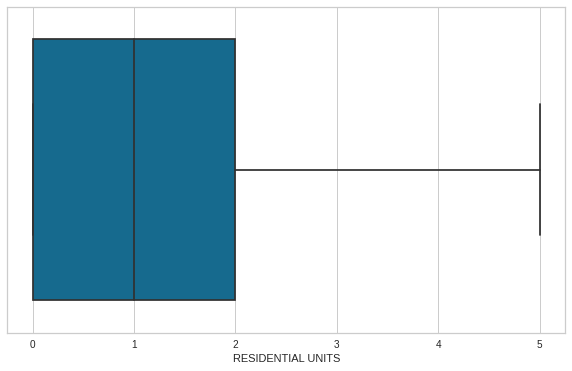

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', data=df,showfliers=False)

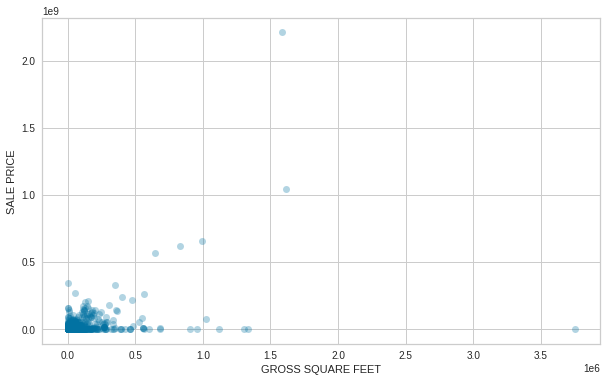

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})

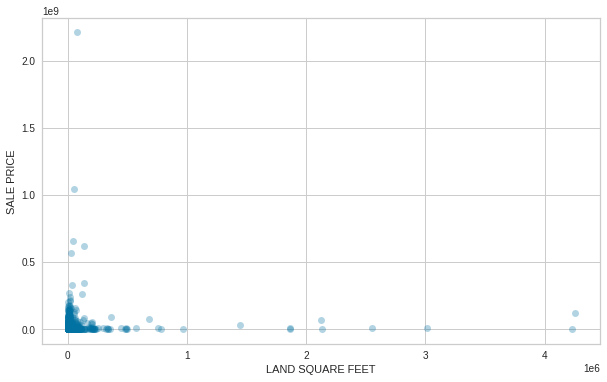

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})

In [ ]:
df.replace(' ',np.nan, inplace=True)

In [ ]:
df.shape

(83783, 20)

In [ ]:
round(df.isna().sum() /len(df) *100,2)

BOROUGH                            0.00
NEIGHBORHOOD                       0.00
BUILDING CLASS CATEGORY            0.00
TAX CLASS AT PRESENT               0.88
BLOCK                              0.00
LOT                                0.00
BUILDING CLASS AT PRESENT          0.88
ADDRESS                            0.00
APARTMENT NUMBER                  77.50
ZIP CODE                           0.00
RESIDENTIAL UNITS                  0.00
COMMERCIAL UNITS                   0.00
TOTAL UNITS                        0.00
LAND SQUARE FEET                  31.10
GROSS SQUARE FEET                 32.69
TAX CLASS AT TIME OF SALE          0.00
BUILDING CLASS AT TIME OF SALE     0.00
SALE PRICE                        16.92
SALE DATE                          0.00
BUILDING AGE                       0.00
dtype: float64

In [ ]:
df = df.drop(['APARTMENT NUMBER'],axis = 1)

In [ ]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
BUILDING AGE                          0
dtype: int64

In [ ]:
new_instances =df[df['SALE PRICE'].isna()]
train=df[~df['SALE PRICE'].isna()]

In [ ]:
train = train[train['SALE PRICE'] >50000 ]

In [ ]:
train.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                585
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           585
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  20807
GROSS SQUARE FEET                 21293
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
BUILDING AGE                          0
dtype: int64

In [ ]:
train.dropna()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING AGE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,2,C2,6625000.0,2017-07-19 00:00:00,117
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,2,C4,3936272.0,2016-09-23 00:00:00,104
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,2,C2,8000000.0,2016-11-17 00:00:00,117
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,2,C4,3192840.0,2016-09-23 00:00:00,97
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,2,D9,16232000.0,2016-11-07 00:00:00,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1,B9,450000.0,2016-11-28 00:00:00,19
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1,B9,550000.0,2017-04-21 00:00:00,19
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1,B2,460000.0,2017-07-05 00:00:00,92
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,4,K6,11693337.0,2016-12-21 00:00:00,16


In [ ]:
new_instances.shape

(14176, 19)

In [ ]:
new_instances.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                 65
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT            65
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                   4896
GROSS SQUARE FEET                  5678
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
BUILDING AGE                          0
dtype: int64

In [ ]:
train.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                585
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           585
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  20807
GROSS SQUARE FEET                 21293
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
BUILDING AGE                          0
dtype: int64

In [ ]:
new_instances

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING AGE
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,2,C7,NaN,2016-12-14 00:00:00,117
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,2,C7,NaN,2016-12-09 00:00:00,117
5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,10009,20,0,20,2581.0,9730.0,2,C4,NaN,2017-07-20 00:00:00,117
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,10009,44,2,46,5163.0,21007.0,2,C7,NaN,2017-07-20 00:00:00,117
8,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,10009,15,0,15,1534.0,9198.0,2,D5,NaN,2017-06-20 00:00:00,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84524,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7091,28,B9,51 CLAY PIT ROAD,10309,2,0,2,2986.0,1820.0,1,B9,NaN,2017-07-06 00:00:00,18
84525,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7091,188,B9,1576 WOODROW ROAD,10309,2,0,2,2490.0,1530.0,1,B9,NaN,2016-10-14 00:00:00,19
84538,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,61,B2,178 DARNELL LANE,10309,2,0,2,3215.0,1300.0,1,B2,NaN,2017-06-30 00:00:00,22
84539,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7316,85,B2,137 DARNELL LANE,10309,2,0,2,3016.0,1300.0,1,B2,NaN,2016-12-30 00:00:00,22


###Mean imputation

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.NaN, strategy='median')


train['LAND SQUARE FEET'] = imputer.fit_transform(train['LAND SQUARE FEET'].values.reshape(-1,1))[:,0]

train['GROSS SQUARE FEET'] = imputer.fit_transform(train['GROSS SQUARE FEET'].values.reshape(-1,1))[:,0]

new_instances['LAND SQUARE FEET'] = imputer.fit_transform(new_instances['LAND SQUARE FEET'].values.reshape(-1,1))[:,0]

new_instances['GROSS SQUARE FEET'] = imputer.fit_transform(new_instances['GROSS SQUARE FEET'].values.reshape(-1,1))[:,0]



In [ ]:
train.isna().sum()

BOROUGH                             0
NEIGHBORHOOD                        0
BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT              585
BLOCK                               0
LOT                                 0
BUILDING CLASS AT PRESENT         585
ADDRESS                             0
ZIP CODE                            0
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
BUILDING AGE                        0
dtype: int64

In [ ]:
new_instances.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                 65
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT            65
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
BUILDING AGE                          0
dtype: int64

In [ ]:
new_instances.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14176 entries, 1 to 84542
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         14176 non-null  int64  
 1   NEIGHBORHOOD                    14176 non-null  object 
 2   BUILDING CLASS CATEGORY         14176 non-null  object 
 3   TAX CLASS AT PRESENT            14111 non-null  object 
 4   BLOCK                           14176 non-null  int64  
 5   LOT                             14176 non-null  int64  
 6   BUILDING CLASS AT PRESENT       14111 non-null  object 
 7   ADDRESS                         14176 non-null  object 
 8   ZIP CODE                        14176 non-null  int64  
 9   RESIDENTIAL UNITS               14176 non-null  int64  
 10  COMMERCIAL UNITS                14176 non-null  int64  
 11  TOTAL UNITS                     14176 non-null  int64  
 12  LAND SQUARE FEET                

In [ ]:
print(train.dropna(axis=0, inplace = True))

None


In [ ]:
train.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
BUILDING AGE                      0
dtype: int64

###Converting Tax class to numerical variable( binning 1A,1B,1C,1D ->1)

In [ ]:

train['TAX CLASS AT PRESENT_correct'] = train['TAX CLASS AT PRESENT'].str[:1].astype(int)
train['TAX CLASS AT PRESENT_correct']
train['TAX CLASS AT TIME OF SALE_correct'] = train['TAX CLASS AT TIME OF SALE'].astype(str).str[:1].astype(int)
train['TAX CLASS AT TIME OF SALE_correct']

0        2
3        2
4        2
6        2
9        2
        ..
84543    1
84544    1
84545    1
84546    4
84547    4
Name: TAX CLASS AT TIME OF SALE_correct, Length: 57090, dtype: int64

In [ ]:
train =train.drop(['BUILDING CLASS AT TIME OF SALE','BUILDING CLASS AT PRESENT','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE'], axis = 1)

In [ ]:
train_cat = [train['BOROUGH']]

###Taking Address information of all instances for plotting on map 

In [ ]:
train_info = [train['BOROUGH'],train['SALE DATE'],train['BLOCK'],train['LOT'],train['BOROUGH'],train['NEIGHBORHOOD'],train['BUILDING CLASS CATEGORY'],train['SALE PRICE'],train['ADDRESS'], train['ZIP CODE']]

In [ ]:
train = train.drop(['SALE DATE','BLOCK','LOT','NEIGHBORHOOD','BUILDING CLASS CATEGORY','ADDRESS','ZIP CODE','BOROUGH','TAX CLASS AT PRESENT_correct','TAX CLASS AT TIME OF SALE_correct'], axis = 1)

###L2 Normalization using sklearn

In [ ]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler,Normalizer

#scaler = StandardScaler().fit(train)
#scaler = MinMaxScaler().fit(train)
scaler = Normalizer().fit(train)
scaled_train = scaler.transform(train)


In [ ]:
scaled_train

array([[7.54716602e-07, 0.00000000e+00, 7.54716602e-07, ...,
        9.72074983e-04, 9.99999497e-01, 1.76603685e-05],
       [2.54047064e-06, 0.00000000e+00, 2.54047064e-06, ...,
        1.72599575e-03, 9.99998344e-01, 2.64208946e-05],
       [7.49999842e-07, 0.00000000e+00, 7.49999842e-07, ...,
        5.76874879e-04, 9.99999790e-01, 1.46249969e-05],
       ...,
       [4.34763864e-06, 0.00000000e+00, 4.34763864e-06, ...,
        3.25203370e-03, 9.99956887e-01, 1.99991377e-04],
       [0.00000000e+00, 5.98527803e-07, 5.98527803e-07, ...,
        5.48225816e-03, 9.99826757e-01, 1.36806355e-06],
       [0.00000000e+00, 1.42496939e-05, 1.42496939e-05, ...,
        3.41992654e-02, 9.87503789e-01, 1.56746633e-04]])

In [ ]:
new_columns = [	'RESIDENTIAL UNITS',	'COMMERCIAL UNITS',	'TOTAL UNITS',	'LAND SQUARE FEET',	'GROSS SQUARE FEET',	'SALE PRICE',	'BUILDING AGE']

scaled_train = pd.DataFrame(scaled_train, columns = new_columns)

scaled_train.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE
0,7.547166e-07,0.0,7.547166e-07,0.000246,0.000972,0.999999,0.000018
1,2.540471e-06,0.0,2.540471e-06,0.000577,0.001726,0.999998,0.000026
2,7.499998e-07,0.0,7.499998e-07,0.000296,0.000577,1.000000,0.000015
3,2.505604e-06,0.0,2.505604e-06,0.000548,0.001324,0.999999,0.000030
4,1.478560e-06,0.0,1.478560e-06,0.000277,0.001141,0.999999,0.000006


In [ ]:
scaled_train.head(2)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE
0,7.547166e-07,0.0,7.547166e-07,0.000246,0.000972,0.999999,0.000018
1,2.540471e-06,0.0,2.540471e-06,0.000577,0.001726,0.999998,0.000026


In [ ]:
#Visualization After Normalization

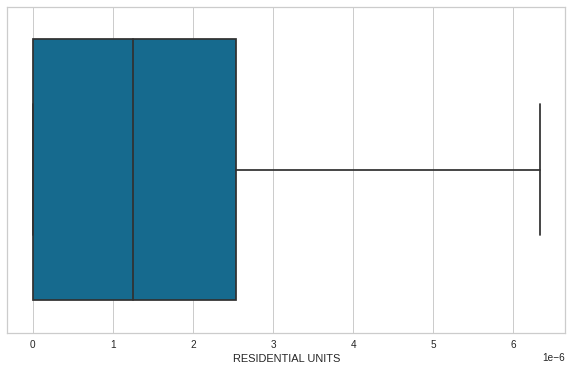

In [577]:
plt.figure(figsize=(10,6))
sns.boxplot(x='RESIDENTIAL UNITS', data= scaled_train,showfliers=False)

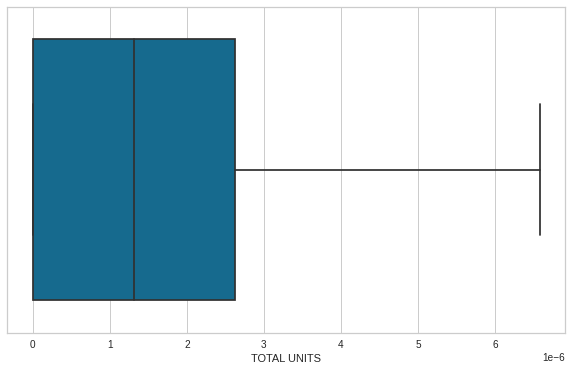

In [578]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TOTAL UNITS', data=scaled_train,showfliers=False)

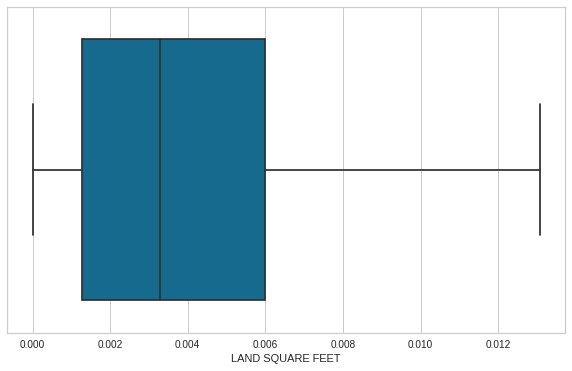

In [579]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LAND SQUARE FEET', data=scaled_train,showfliers=False)

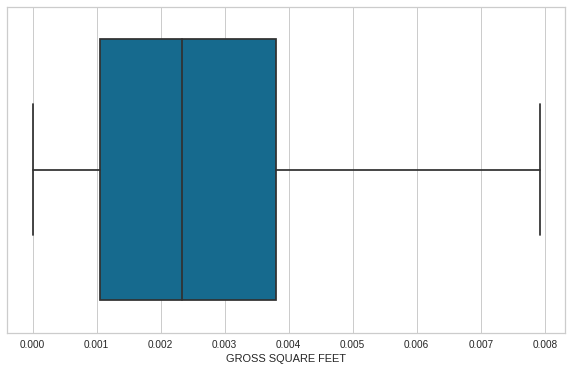

In [580]:
plt.figure(figsize=(10,6))
sns.boxplot(x='GROSS SQUARE FEET', data=scaled_train,showfliers=False)

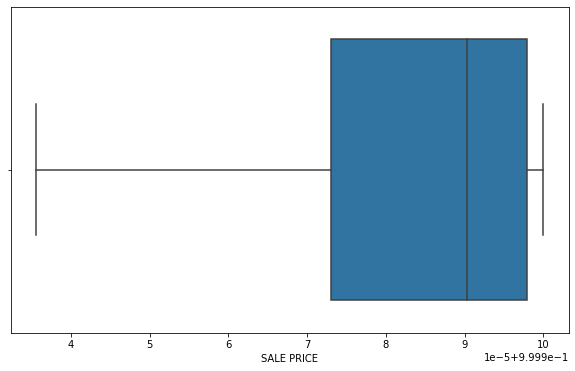

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='SALE PRICE', data=scaled_train,showfliers=False)

#Clustering

###Using elbow method to determine optimal K value
#####The k-means algorithm tries to minimize distortion, which is defined as the sum of the squared distances between each observation vector and its dominating centroid

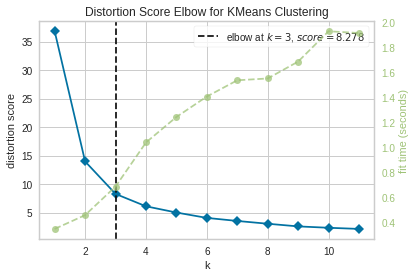

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(scaled_train)
visualizer.show()

###Clustering with k value = 3

In [ ]:
new = scaled_train
df_new = pd.DataFrame()



kmeans = KMeans(n_clusters=3, random_state=5)
scaled_train['cluster'] = kmeans.fit_predict(scaled_train)
 
label = kmeans.fit_predict(scaled_train)


centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]





scaled_train['cen_x'] = scaled_train.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
scaled_train['cen_y'] = scaled_train.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
## add cluster label to Dataframe
#scaled_train['cen_x'] = scaled_train.cluster.map({0:cen_x[0], 1:cen_x[1], })
#scaled_train['cen_y'] = scaled_train.cluster.map({0:cen_y[0], 1:cen_y[1], })


# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
#colors = ['#DF2020', '#81DF20']
#scaled_train['c'] = scaled_train.cluster.map({0:colors[0], 1:colors[1], 2:colors[2],3:colors[2],4:colors[2]})
scaled_train['c'] = scaled_train.cluster.map({0:colors[0], 1:colors[1], 2:colors[2],})

In [ ]:
scaled_train.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,cluster,cen_x,cen_y,c
0,7.547166e-07,0.0,7.547166e-07,0.000246,0.000972,0.999999,0.000018,0,0.000002,1.903731e-07,#DF2020
1,2.540471e-06,0.0,2.540471e-06,0.000577,0.001726,0.999998,0.000026,0,0.000002,1.903731e-07,#DF2020
2,7.499998e-07,0.0,7.499998e-07,0.000296,0.000577,1.000000,0.000015,0,0.000002,1.903731e-07,#DF2020
3,2.505604e-06,0.0,2.505604e-06,0.000548,0.001324,0.999999,0.000030,0,0.000002,1.903731e-07,#DF2020
4,1.478560e-06,0.0,1.478560e-06,0.000277,0.001141,0.999999,0.000006,0,0.000002,1.903731e-07,#DF2020


In [ ]:
score_train = scaled_train.drop(['cluster','cen_x',	'cen_y',	'c'], axis = 1)

###Evaluating Clustering results

In [ ]:
Centroids = scaled_train.groupby(["cluster"]).mean()[["GROSS SQUARE FEET","SALE PRICE"]]

In [ ]:
print(Centroids)

         GROSS SQUARE FEET  SALE PRICE
cluster                               
0                 0.003058    0.999940
1                 0.738822    0.602389
2                 0.211300    0.462427


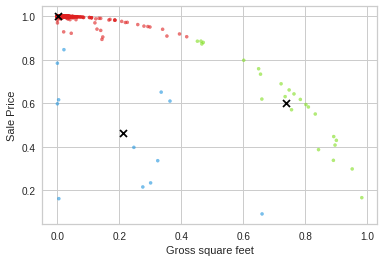

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(scaled_train['GROSS SQUARE FEET'], scaled_train['SALE PRICE'], c=scaled_train.c, alpha = 0.6, s=10)
plt.scatter(Centroids["GROSS SQUARE FEET"],Centroids["SALE PRICE"],c='black',marker = 'x')


plt.xlabel('Gross square feet')
plt.ylabel('Sale Price')
plt.show()




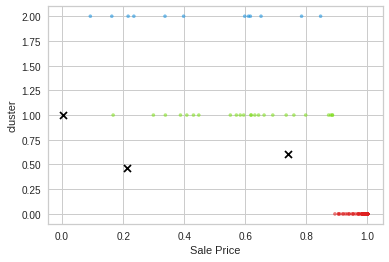

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(scaled_train['SALE PRICE'], scaled_train['cluster'], c=scaled_train.c, alpha = 0.6, s=10)
plt.scatter(Centroids["GROSS SQUARE FEET"],Centroids["SALE PRICE"],c='black',marker = 'x')

plt.xlabel('Sale Price')
plt.ylabel('cluster')
plt.show()

In [ ]:
from collections import Counter
Counter(kmeans.labels_)


Counter({0: 57054, 1: 24, 2: 12})

In [ ]:
from sklearn.metrics import silhouette_score



print('kmeans silhouette score: {}'.format(silhouette_score(score_train, kmeans.labels_, 
                                           metric='euclidean')))

kmeans silhouette score: 0.9921627626045594


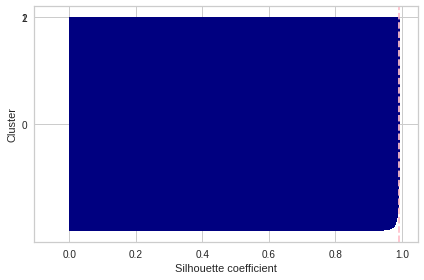

completeness_score :  1.0
homogeneity_score :  1.0


In [ ]:
import pylab as pl
from sklearn.metrics import silhouette_score,silhouette_samples
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="pink", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    pl.show()
    
    return

plot_silhouettes(score_train,kmeans.labels_)

from sklearn.metrics import  homogeneity_score,completeness_score

print("completeness_score : ",completeness_score(label,kmeans.labels_))
print("homogeneity_score : ",homogeneity_score(label,kmeans.labels_))


Finding Mean to get centroid values 

In [ ]:
cl0 = scaled_train[scaled_train['cluster'] == 0]
cl1 = scaled_train[scaled_train['cluster'] == 1]
cl2 = scaled_train[scaled_train['cluster'] == 2]


In [ ]:
cl0.describe() 


,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,cluster,cen_x,cen_y
count,57054.000000,5.705400e+04,57054.000000,57054.000000,57054.000000,57054.000000,57054.000000,57054.0,5.705400e+04,5.705400e+04
mean,0.000002,1.903731e-07,0.000002,0.004587,0.003058,0.999940,0.000411,0.0,1.926883e-06,1.903731e-07
std,0.000006,3.005075e-05,0.000031,0.007008,0.005961,0.001209,0.001727,0.0,1.290890e-18,2.023897e-19
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.893586,0.000000,0.0,1.926883e-06,1.903731e-07
25%,0.000000,0.000000e+00,0.000000,0.001267,0.001058,0.999973,0.000044,0.0,1.926883e-06,1.903731e-07
50%,0.000001,0.000000e+00,0.000001,0.003285,0.002326,0.999990,0.000108,0.0,1.926883e-06,1.903731e-07
75%,0.000003,0.000000e+00,0.000003,0.005992,0.003801,0.999998,0.000212,0.0,1.926883e-06,1.903731e-07
max,0.000511,7.176356e-03,0.007176,0.425249,0.417342,1.000000,0.039742,0.0,1.926883e-06,1.903731e-07


In [ ]:
cl1.describe()


,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,cluster,cen_x,cen_y
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,2.400000e+01,2.400000e+01
mean,0.000361,0.000009,0.000370,0.128518,0.738822,0.602389,0.000158,1.0,3.608333e-04,9.006000e-06
std,0.000377,0.000008,0.000373,0.117622,0.158621,0.197499,0.000117,0.0,5.537605e-20,5.191505e-21
min,0.000000,0.000000,0.000008,0.030932,0.451988,0.167203,0.000041,1.0,3.608333e-04,9.006000e-06
25%,0.000000,0.000000,0.000014,0.052008,0.654174,0.443330,0.000069,1.0,3.608333e-04,9.006000e-06
50%,0.000408,0.000011,0.000419,0.063437,0.759798,0.618876,0.000094,1.0,3.608333e-04,9.006000e-06
75%,0.000647,0.000014,0.000647,0.173547,0.855014,0.740280,0.000258,1.0,3.608333e-04,9.006000e-06
max,0.001042,0.000030,0.001042,0.424749,0.982669,0.885584,0.000368,1.0,3.608333e-04,9.006000e-06


In [ ]:
cl2.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,cluster,cen_x,cen_y
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,1.200000e+01,12.000000
mean,0.000124,0.000006,0.000131,0.790355,0.211300,0.462427,0.005281,2.0,1.244583e-04,0.000006
std,0.000187,0.000017,0.000184,0.139235,0.208423,0.254060,0.008413,0.0,2.831031e-20,0.000000
min,0.000000,0.000000,0.000000,0.531062,0.000000,0.092489,0.000007,2.0,1.244583e-04,0.000006
25%,0.000000,0.000000,0.000000,0.697919,0.004333,0.230318,0.000048,2.0,1.244583e-04,0.000006
50%,0.000000,0.000000,0.000005,0.794271,0.261231,0.498030,0.000221,2.0,1.244583e-04,0.000006
75%,0.000327,0.000002,0.000330,0.894123,0.326635,0.625327,0.007078,2.0,1.244583e-04,0.000006
max,0.000464,0.000060,0.000464,0.986653,0.660736,0.846632,0.027323,2.0,1.244583e-04,0.000006


In [ ]:
Centroids = scaled_train.groupby(["cluster"]).mean()[["LAND SQUARE FEET","SALE PRICE"]]

In [ ]:
print(Centroids)

         LAND SQUARE FEET  SALE PRICE
cluster                              
0                0.004587    0.999940
1                0.128518    0.602389
2                0.790355    0.462427


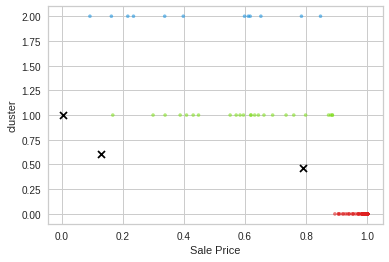

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(scaled_train['SALE PRICE'], scaled_train['cluster'], c=scaled_train.c, alpha = 0.6, s=10)
plt.scatter(Centroids["LAND SQUARE FEET"],Centroids["SALE PRICE"],c='black',marker = 'x')

plt.xlabel('Sale Price')
plt.ylabel('cluster')
plt.show()

labels= 0-red , 1-green  ,2-blue

###We visualize the cluster and their respective centroids with land square feet and sales price as we find that Land square feet is an important feature for classifying the clusters using random forest classifier in later part of the notebook

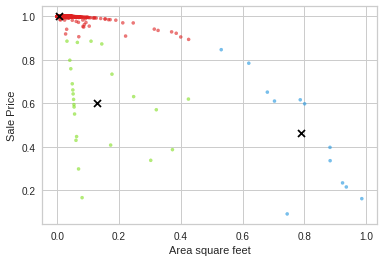

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(scaled_train['LAND SQUARE FEET'], scaled_train['SALE PRICE'], c=scaled_train.c, alpha = 0.6, s=10)
plt.scatter(Centroids["LAND SQUARE FEET"],Centroids["SALE PRICE"],c='black',marker = 'x')


plt.xlabel('Area square feet')
plt.ylabel('Sale Price')
plt.show()





labels= 0-red , 1-green  ,2-blue

we can see that when the Area square feet value crosses 0.5 only green clusters exist 

In [ ]:
score_train = scaled_train.drop(['cluster','cen_x',	'cen_y',	'c'], axis = 1)

In [ ]:
from collections import Counter
Counter(kmeans.labels_)


Counter({0: 57054, 1: 24, 2: 12})

#Random Forest Classifier

###Data Preparation

In [ ]:

#Taking cluster value as target 

target = [scaled_train['cluster']]
target = pd.DataFrame(target)
target = target.T

#Removing Sales price and target(cluster) from Training data 

scaled_train_new = scaled_train.drop(['cluster','cen_x','cen_y','c','SALE PRICE'], axis = 1)


In [ ]:
scaled_train_new.head(2)


,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING AGE
0,7.547166e-07,0.0,7.547166e-07,0.000246,0.000972,0.000018
1,2.540471e-06,0.0,2.540471e-06,0.000577,0.001726,0.000026


####Train-Test split

In [ ]:
# Using Skicit-learn to split data into training and testing sets

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

train_features, test_features, train_labels, test_labels = train_test_split(scaled_train_new, target, test_size = 0.25, random_state = 42)

###Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 100 decision trees

rf = RandomForestClassifier(n_estimators = 100, random_state = 5)

# Train the model on training data

rf.fit(train_features, train_labels);

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 5)
# Train the model on training data
rf.fit(train_features, train_labels);

Text(0.5, 0, 'Random Forest Feature Importance')

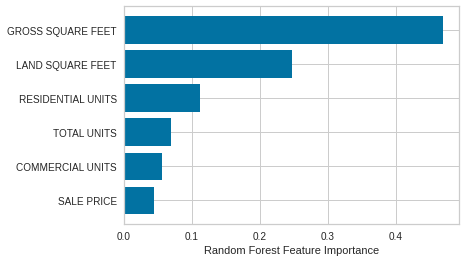

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

###Testing with Test data and Evaluating Classifier Accuracy

1.0


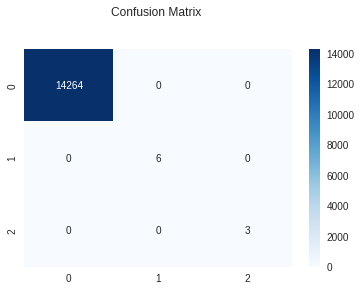

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14264
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3

    accuracy                           1.00     14273
   macro avg       1.00      1.00      1.00     14273
weighted avg       1.00      1.00      1.00     14273



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix


#Predicting Test data

y_pred_test = rf.predict(test_features)                                        

#Comparing with actual labels

print(accuracy_score(test_labels, y_pred_test))                             



#plotting confusion matrix

cf_matrix = confusion_matrix(test_labels, y_pred_test)
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n\n');
plt.show()


#Printing classification report


print(classification_report(test_labels, y_pred_test))

In [ ]:
new_instances.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                 65
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT            65
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
BUILDING AGE                          0
dtype: int64

In [ ]:
new_instances.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING AGE
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,2,C7,NaN,2016-12-14 00:00:00,117
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,2,C7,NaN,2016-12-09 00:00:00,117


###Plotting ROC-AUC Curve and calculating Area under the curve

In [ ]:
from sklearn.preprocessing import label_binarize


y_score = rf.predict_proba(test_features)

y_test_bin = label_binarize(test_labels, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

Since there is no .decision function to develop the y_score, we use .predict_proba instead

Using .predict_proba provides you with a y_score that will need to be binarized using label_binarize from sklearn.preprocessing. In our case, we have 3 classes namely 0,1,2.

AUC for Class 1: 1.0
AUC for Class 2: 1.0
AUC for Class 3: 0.9999999999999999


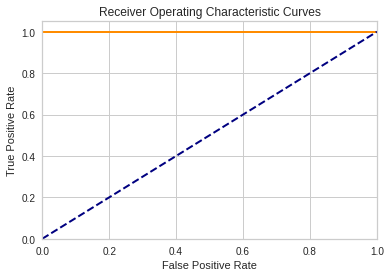

In [ ]:
import numpy as np
from sklearn import metrics


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC for Class {}: {}'.format(i+1, metrics.auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()

###Dropping columns to have the same features as our Random Forest Training data

In [ ]:
user_queries = new_instances.drop(['SALE PRICE'], axis = 1)

In [ ]:
sep = user_queries

In [ ]:
user_queries.dropna(axis=0, inplace = True)

In [ ]:

user_queries['TAX CLASS AT PRESENT_correct'] = user_queries['TAX CLASS AT PRESENT'].str[:1].astype(int)
user_queries['TAX CLASS AT PRESENT_correct']


user_queries['TAX CLASS AT TIME OF SALE_correct'] = user_queries['TAX CLASS AT TIME OF SALE'].astype(str).str[:1].astype(int)
user_queries['TAX CLASS AT TIME OF SALE_correct']

1        2
2        2
5        2
7        2
8        2
        ..
84524    1
84525    1
84538    1
84539    1
84542    1
Name: TAX CLASS AT TIME OF SALE_correct, Length: 14111, dtype: int64

In [ ]:
user_queries =user_queries.drop(['BUILDING CLASS AT TIME OF SALE','BUILDING CLASS AT PRESENT','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE'], axis = 1)

In [ ]:
user_queries_info= [user_queries['BOROUGH'],user_queries['SALE DATE'],user_queries['BLOCK'],user_queries['LOT'],user_queries['BOROUGH'],user_queries['NEIGHBORHOOD'],user_queries['BUILDING CLASS CATEGORY'],user_queries['ADDRESS'], user_queries['ZIP CODE']]

In [ ]:
user_queries = pd.DataFrame(user_queries)



In [ ]:
user_queries = user_queries.drop(['SALE DATE','BLOCK','LOT','NEIGHBORHOOD','BUILDING CLASS CATEGORY','ADDRESS','ZIP CODE'], axis = 1)

In [ ]:
user_queries

,BOROUGH,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING AGE,TAX CLASS AT PRESENT_correct,TAX CLASS AT TIME OF SALE_correct
1,1,28,3,31,4616.0,18690.0,117,2,2
2,1,16,1,17,2212.0,7803.0,117,2,2
5,1,20,0,20,2581.0,9730.0,117,2,2
7,1,44,2,46,5163.0,21007.0,117,2,2
8,1,15,0,15,1534.0,9198.0,97,2,2
...,...,...,...,...,...,...,...,...,...
84524,5,2,0,2,2986.0,1820.0,18,1,1
84525,5,2,0,2,2490.0,1530.0,19,1,1
84538,5,2,0,2,3215.0,1300.0,22,1,1
84539,5,2,0,2,3016.0,1300.0,22,1,1


In [ ]:
scaler = Normalizer().fit(user_queries)
user_queries = scaler.transform(user_queries)

In [ ]:
user_queries

array([[5.19426901e-05, 1.45439532e-03, 1.55828070e-04, ...,
        6.07729474e-03, 1.03885380e-04, 1.03885380e-04],
       [1.23284042e-04, 1.97254467e-03, 1.23284042e-04, ...,
        1.44242329e-02, 2.46568084e-04, 2.46568084e-04],
       [9.93322685e-05, 1.98664537e-03, 0.00000000e+00, ...,
        1.16218754e-02, 1.98664537e-04, 1.98664537e-04],
       ...,
       [1.44176995e-03, 5.76707982e-04, 0.00000000e+00, ...,
        6.34378780e-03, 2.88353991e-04, 2.88353991e-04],
       [1.52238394e-03, 6.08953577e-04, 0.00000000e+00, ...,
        6.69848934e-03, 3.04476788e-04, 3.04476788e-04],
       [1.42215227e-03, 5.68860909e-04, 0.00000000e+00, ...,
        5.68860909e-03, 2.84430455e-04, 2.84430455e-04]])

In [ ]:
new_columns = ['BOROUGH',	'RESIDENTIAL UNITS',	'COMMERCIAL UNITS',	'TOTAL UNITS',	'LAND SQUARE FEET',	'GROSS SQUARE FEET',	'BUILDING AGE',	'TAX CLASS AT PRESENT_correct',	'TAX CLASS AT TIME OF SALE_correct']

user_queries = pd.DataFrame(user_queries, columns = new_columns)



In [ ]:
user_queries = user_queries.drop(['BOROUGH','TAX CLASS AT PRESENT_correct',	'TAX CLASS AT TIME OF SALE_correct'],axis =1)

###Instances that dont have sales price are predicted to be one of the three categories using Random Forest Classifier

In [ ]:
#Predictions for buildings without classification

Predictions = rf.predict(user_queries)

In [ ]:
Predictions = pd.DataFrame(Predictions)


In [ ]:
Predictions.info

<bound method DataFrame.info of        0
0      1
1      1
2      1
3      1
4      1
...   ..
14106  1
14107  1
14108  2
14109  2
14110  1

[14111 rows x 1 columns]>

In [ ]:
user_queries['predictions'] = Predictions

In [ ]:
user_queries_info = pd.DataFrame(user_queries_info)

user_queries_info = user_queries_info.T

queries_result = pd.concat([user_queries.reset_index(drop=True),user_queries_info.reset_index(drop = True)], axis=1)

In [ ]:
queries_result.head(2)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING AGE,predictions,BOROUGH,SALE DATE,BLOCK,LOT,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE
0,0.001454,0.000156,0.001610,0.239767,0.970809,0.006077,1,1,2016-12-14 00:00:00,399,26,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,234 EAST 4TH STREET,10009
1,0.001973,0.000123,0.002096,0.272704,0.961985,0.014424,1,1,2016-12-09 00:00:00,399,39,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,197 EAST 3RD STREET,10009


In [ ]:
queries_result['Full Address'] = queries_result['ADDRESS'] +',New York,'+ queries_result['ZIP CODE'].astype(str)

In [ ]:
queries_result

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING AGE,predictions,BOROUGH,SALE DATE,BLOCK,LOT,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,Full Address
0,0.001454,0.000156,0.001610,0.239767,0.970809,0.006077,1,1,2016-12-14 00:00:00,399,26,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,234 EAST 4TH STREET,10009,"234 EAST 4TH STREET,New York,10009"
1,0.001973,0.000123,0.002096,0.272704,0.961985,0.014424,1,1,2016-12-09 00:00:00,399,39,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,197 EAST 3RD STREET,10009,"197 EAST 3RD STREET,New York,10009"
2,0.001987,0.000000,0.001987,0.256377,0.966503,0.011622,1,1,2017-07-20 00:00:00,405,16,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,516 EAST 12TH STREET,10009,"516 EAST 12TH STREET,New York,10009"
3,0.002034,0.000092,0.002126,0.238668,0.971082,0.005409,1,1,2017-07-20 00:00:00,407,18,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,520 EAST 14TH STREET,10009,"520 EAST 14TH STREET,New York,10009"
4,0.001608,0.000000,0.001608,0.164494,0.986321,0.010402,1,1,2017-06-20 00:00:00,379,34,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,141 AVENUE D,10009,"141 AVENUE D,New York,10009"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14106,0.000572,0.000000,0.000572,0.853877,0.520447,0.005147,1,5,2017-07-06 00:00:00,7091,28,5,WOODROW,02 TWO FAMILY DWELLINGS,51 CLAY PIT ROAD,10309,"51 CLAY PIT ROAD,New York,10309"
14107,0.000684,0.000000,0.000684,0.851991,0.523512,0.006501,1,5,2016-10-14 00:00:00,7091,188,5,WOODROW,02 TWO FAMILY DWELLINGS,1576 WOODROW ROAD,10309,"1576 WOODROW ROAD,New York,10309"
14108,0.000577,0.000000,0.000577,0.927058,0.374860,0.006344,2,5,2017-06-30 00:00:00,7316,61,5,WOODROW,02 TWO FAMILY DWELLINGS,178 DARNELL LANE,10309,"178 DARNELL LANE,New York,10309"
14109,0.000609,0.000000,0.000609,0.918302,0.395820,0.006698,2,5,2016-12-30 00:00:00,7316,85,5,WOODROW,02 TWO FAMILY DWELLINGS,137 DARNELL LANE,10309,"137 DARNELL LANE,New York,10309"


#Visualizations and Geographical Plots 

In [ ]:
train_info = pd.DataFrame(train_info)

train_info = train_info.T

train_info = train_info.dropna()



In [ ]:
train_info

,BOROUGH,SALE DATE,BLOCK,LOT,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,SALE PRICE,ADDRESS,ZIP CODE
0,1,2017-07-19 00:00:00,392,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,6625000.0,153 AVENUE B,10009
3,1,2016-09-23 00:00:00,402,21,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,3936272.0,154 EAST 7TH STREET,10009
4,1,2016-11-17 00:00:00,404,55,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,8000000.0,301 EAST 10TH STREET,10009
6,1,2016-09-23 00:00:00,406,32,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,3192840.0,210 AVENUE B,10009
9,1,2016-11-07 00:00:00,387,153,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,16232000.0,629 EAST 5TH STREET,10009
...,...,...,...,...,...,...,...,...,...,...
84543,5,2016-11-28 00:00:00,7349,34,5,WOODROW,02 TWO FAMILY DWELLINGS,450000.0,37 QUAIL LANE,10309
84544,5,2017-04-21 00:00:00,7349,78,5,WOODROW,02 TWO FAMILY DWELLINGS,550000.0,32 PHEASANT LANE,10309
84545,5,2017-07-05 00:00:00,7351,60,5,WOODROW,02 TWO FAMILY DWELLINGS,460000.0,49 PITNEY AVENUE,10309
84546,5,2016-12-21 00:00:00,7100,28,5,WOODROW,22 STORE BUILDINGS,11693337.0,2730 ARTHUR KILL ROAD,10309


In [ ]:
cd2 = queries_result

In [ ]:
cd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14111 entries, 0 to 14110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RESIDENTIAL UNITS        14111 non-null  float64
 1   COMMERCIAL UNITS         14111 non-null  float64
 2   TOTAL UNITS              14111 non-null  float64
 3   LAND SQUARE FEET         14111 non-null  float64
 4   GROSS SQUARE FEET        14111 non-null  float64
 5   BUILDING AGE             14111 non-null  float64
 6   predictions              14111 non-null  int32  
 7   BOROUGH                  14111 non-null  object 
 8   SALE DATE                14111 non-null  object 
 9   BLOCK                    14111 non-null  object 
 10  LOT                      14111 non-null  object 
 11  BOROUGH                  14111 non-null  object 
 12  NEIGHBORHOOD             14111 non-null  object 
 13  BUILDING CLASS CATEGORY  14111 non-null  object 
 14  ADDRESS               

In [ ]:
cd2.head(2)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING AGE,predictions,BOROUGH,SALE DATE,BLOCK,LOT,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,Full Address
0,0.001454,0.000156,0.001610,0.239767,0.970809,0.006077,1,1,2016-12-14 00:00:00,399,26,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,234 EAST 4TH STREET,10009,"234 EAST 4TH STREET,New York,10009"
1,0.001973,0.000123,0.002096,0.272704,0.961985,0.014424,1,1,2016-12-09 00:00:00,399,39,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,197 EAST 3RD STREET,10009,"197 EAST 3RD STREET,New York,10009"


In [ ]:
clustercol2 = [queries_result['predictions']]
cluster_col2 =  pd.DataFrame(clustercol2)
cluster_col2 = cluster_col2.T

In [ ]:
cluster_col2

,predictions
0,1
1,1
2,1
3,1
4,1
...,...
14106,1
14107,1
14108,2
14109,2


In [ ]:
cd2 = pd.concat([sep.reset_index(drop=True),cluster_col2.reset_index(drop = True)], axis=1)

In [ ]:
cd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14111 entries, 0 to 14110
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BOROUGH                            14111 non-null  int64  
 1   NEIGHBORHOOD                       14111 non-null  object 
 2   BUILDING CLASS CATEGORY            14111 non-null  object 
 3   TAX CLASS AT PRESENT               14111 non-null  object 
 4   BLOCK                              14111 non-null  int64  
 5   LOT                                14111 non-null  int64  
 6   BUILDING CLASS AT PRESENT          14111 non-null  object 
 7   ADDRESS                            14111 non-null  object 
 8   ZIP CODE                           14111 non-null  int64  
 9   RESIDENTIAL UNITS                  14111 non-null  int64  
 10  COMMERCIAL UNITS                   14111 non-null  int64  
 11  TOTAL UNITS                        14111 non-null  int

In [ ]:
cd2.head(2)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE,BUILDING AGE,TAX CLASS AT PRESENT_correct,TAX CLASS AT TIME OF SALE_correct,predictions
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,...,31,4616.0,18690.0,2,C7,2016-12-14 00:00:00,117,2,2,1
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,...,17,2212.0,7803.0,2,C7,2016-12-09 00:00:00,117,2,2,1


In [ ]:
cd2 = cd2.drop(cd2.iloc[:, 0:12],
                       axis = 1)

In [ ]:
cd2 = cd2.drop(cd2.iloc[:, 2:7],
                       axis = 1)

In [ ]:
cd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14111 entries, 0 to 14110
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LAND SQUARE FEET                   14111 non-null  float64
 1   GROSS SQUARE FEET                  14111 non-null  float64
 2   TAX CLASS AT TIME OF SALE_correct  14111 non-null  int64  
 3   predictions                        14111 non-null  int32  
dtypes: float64(2), int32(1), int64(1)
memory usage: 386.0 KB


In [ ]:
cd = train

In [ ]:
cd1 = pd.concat([cd.reset_index(drop=True),train_info.reset_index(drop = True)], axis=1)

In [ ]:
cd = train

In [ ]:
clustercol1 = [scaled_train['cluster']]
cluster_col1 =  pd.DataFrame(clustercol1)
cluster_col1 = cluster_col1.T

In [ ]:
cd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57090 entries, 0 to 57089
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RESIDENTIAL UNITS        57090 non-null  int64  
 1   COMMERCIAL UNITS         57090 non-null  int64  
 2   TOTAL UNITS              57090 non-null  int64  
 3   LAND SQUARE FEET         57090 non-null  float64
 4   GROSS SQUARE FEET        57090 non-null  float64
 5   SALE PRICE               57090 non-null  float64
 6   BUILDING AGE             57090 non-null  int64  
 7   BOROUGH                  57090 non-null  object 
 8   SALE DATE                57090 non-null  object 
 9   BLOCK                    57090 non-null  object 
 10  LOT                      57090 non-null  object 
 11  BOROUGH                  57090 non-null  object 
 12  NEIGHBORHOOD             57090 non-null  object 
 13  BUILDING CLASS CATEGORY  57090 non-null  object 
 14  SALE PRICE            

In [ ]:
cd = pd.concat([cd1.reset_index(drop=True),cluster_col1.reset_index(drop = True)], axis=1)

In [ ]:
cd.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BUILDING AGE,BOROUGH,SALE DATE,BLOCK,LOT,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,SALE PRICE,ADDRESS,ZIP CODE,cluster
0,5,0,5,1633.0,6440.0,6625000.0,117,1,2017-07-19 00:00:00,392,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,6625000.0,153 AVENUE B,10009,0
1,10,0,10,2272.0,6794.0,3936272.0,104,1,2016-09-23 00:00:00,402,21,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,3936272.0,154 EAST 7TH STREET,10009,0
2,6,0,6,2369.0,4615.0,8000000.0,117,1,2016-11-17 00:00:00,404,55,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,8000000.0,301 EAST 10TH STREET,10009,0
3,8,0,8,1750.0,4226.0,3192840.0,97,1,2016-09-23 00:00:00,406,32,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,3192840.0,210 AVENUE B,10009,0
4,24,0,24,4489.0,18523.0,16232000.0,97,1,2016-11-07 00:00:00,387,153,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,16232000.0,629 EAST 5TH STREET,10009,0


In [ ]:
cd2.head()

,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE_correct,predictions
0,4616.0,18690.0,2,1
1,2212.0,7803.0,2,1
2,2581.0,9730.0,2,1
3,5163.0,21007.0,2,1
4,1534.0,9198.0,2,1


In [ ]:
!pip install geopy

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.p

In [ ]:
from geopy.geocoders import Nominatim



In [ ]:
queries_result = queries_result.groupby('predictions', group_keys=False).apply(lambda x: x.sample(10))

In [ ]:
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

locator = Nominatim(timeout=3, scheme='http')

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)


# 2- - create location column
queries_result['location'] = queries_result['Full Address'].apply(geocode)


# 3 - create longitude, laatitude and altitude from location column (returns tuple)
queries_result['point'] = queries_result['location'].apply(lambda loc: tuple(loc.point) if loc else None)


# 4 - split point column into latitude, longitude and altitude columns
queries_result[['latitude', 'longitude', 'altitude']] = pd.DataFrame(queries_result['point'].tolist(), index=queries_result.index)



RateLimiter caught an error, retrying (0/2 tries). Called with (*('153-15 79 AVE.,New York,11367',), **{}).
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/geopy/geocoders/base.py", line 344, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/usr/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/usr/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.7/urllib/request.py", line 563, in error
    result = self._call_chain(*args)
  File "/usr/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.7/urllib/request.py", line 755, in http_error_302
    return self.parent.open(new, timeout=req.timeout)
  File "/usr/lib/python3.7/urllib/request.py", line 525, in open
    response = self._open(req, data)
  File "/usr/lib/python3.7/urllib/request.py", lin

In [ ]:
queries_result.dropna(axis=0, inplace = True)

In [ ]:
queries_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 8345 to 2285
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RESIDENTIAL UNITS        15 non-null     float64
 1   COMMERCIAL UNITS         15 non-null     float64
 2   TOTAL UNITS              15 non-null     float64
 3   LAND SQUARE FEET         15 non-null     float64
 4   GROSS SQUARE FEET        15 non-null     float64
 5   BUILDING AGE             15 non-null     float64
 6   predictions              15 non-null     int32  
 7   BOROUGH                  15 non-null     object 
 8   SALE DATE                15 non-null     object 
 9   BLOCK                    15 non-null     object 
 10  LOT                      15 non-null     object 
 11  BOROUGH                  15 non-null     object 
 12  NEIGHBORHOOD             15 non-null     object 
 13  BUILDING CLASS CATEGORY  15 non-null     object 
 14  ADDRESS                

In [ ]:
scaled_train = scaled_train.drop(['SALE PRICE'], axis = 1)

In [ ]:
result = pd.concat([scaled_train.reset_index(drop=True),train_info.reset_index(drop = True)], axis=1)

In [ ]:
result['Full Address'] = result['ADDRESS'] +',New York,'+ result['ZIP CODE'].astype(str)

In [ ]:

result.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57090 entries, 0 to 57089
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RESIDENTIAL UNITS        57090 non-null  float64
 1   COMMERCIAL UNITS         57090 non-null  float64
 2   TOTAL UNITS              57090 non-null  float64
 3   LAND SQUARE FEET         57090 non-null  float64
 4   GROSS SQUARE FEET        57090 non-null  float64
 5   BUILDING AGE             57090 non-null  float64
 6   cluster                  57090 non-null  int32  
 7   cen_x                    57090 non-null  float64
 8   cen_y                    57090 non-null  float64
 9   c                        57090 non-null  object 
 10  BOROUGH                  57090 non-null  object 
 11  SALE DATE                57090 non-null  object 
 12  BLOCK                    57090 non-null  object 
 13  LOT                      57090 non-null  object 
 14  BOROUGH               

In [ ]:
!pip install gmplot
import gmplot


In [ ]:

import folium # plotting library
from folium import plugins

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

In [ ]:
latitude = 38.500000
longitude = -95.665

map_USA = folium.Map(location=[latitude, longitude], zoom_start=4)



In [ ]:
!pip install geopandas


In [ ]:
import geopandas as gpd
gdf = gpd.read_file('/content/drive/MyDrive/Nyc clustering project/nybb/geo_export_75790be8-4b1b-4a31-a917-b808e3414c98.shp',header = 0)

In [ ]:
gdf

,boro_code,boro_name,shape_leng,shape_area,geometry
0,4.0,Queens,900269.280485,3.040206e+09,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
1,3.0,Brooklyn,728477.954082,1.934167e+09,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
2,5.0,Staten Island,325924.002076,1.623631e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
3,1.0,Manhattan,359993.126318,6.366208e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2.0,Bronx,463868.599917,1.187194e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [ ]:
gdf = gdf.to_crs(epsg=4326)
print(gdf.crs)
gdf.head()

epsg:4326


,boro_code,boro_name,shape_leng,shape_area,geometry
0,4.0,Queens,900269.280485,3.040206e+09,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."
1,3.0,Brooklyn,728477.954082,1.934167e+09,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
2,5.0,Staten Island,325924.002076,1.623631e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
3,1.0,Manhattan,359993.126318,6.366208e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2.0,Bronx,463868.599917,1.187194e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


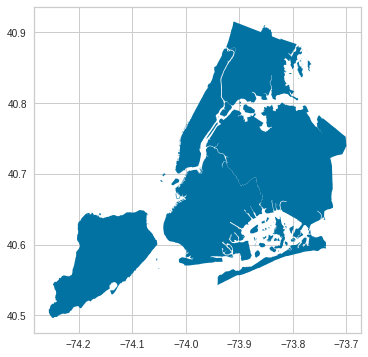

In [ ]:
gdf.plot(figsize=(6, 6))
plt.show()

In [ ]:
import folium # plotting library
from folium import plugins

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors





m = folium.Map(location=[latitude, longitude], zoom_start=4)



for _, r in gdf.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['boro_name']).add_to(geo_j)
    geo_j.add_to(m)


In [ ]:
# Project to NAD83 projected crs
gdf = gdf.to_crs(epsg=2263)

# Access the centroid attribute of each polygon
gdf['centroid'] = gdf.centroid

In [ ]:
# Project to WGS84 geographic crs

# geometry (active) column
gdf = gdf.to_crs(epsg=4326)

# Centroid column
gdf['centroid'] = gdf['centroid'].to_crs(epsg=4326)

gdf.head()

,boro_code,boro_name,shape_leng,shape_area,geometry,centroid
0,4.0,Queens,900269.280485,3.040206e+09,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...",POINT (-73.81856 40.70766)
1,3.0,Brooklyn,728477.954082,1.934167e+09,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",POINT (-73.94785 40.64475)
2,5.0,Staten Island,325924.002076,1.623631e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",POINT (-74.15340 40.58083)
3,1.0,Manhattan,359993.126318,6.366208e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",POINT (-73.96720 40.77724)
4,2.0,Bronx,463868.599917,1.187194e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",POINT (-73.86651 40.85264)


In [ ]:
for _, r in gdf.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon],
                  popup='Borough Name: {} <br> area: {}'.format(r['boro_name'], r['shape_area'])).add_to(m)

                  

In [ ]:
m

In [ ]:


x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, predictions in zip(queries_result['latitude'], queries_result['longitude'],  queries_result['predictions']):
    #label = folium.Popup(str(city)+ ','+str(state) + '- predictions ' + str(predictions), parse_html=True)
    label = folium.Popup( '- predictions ' + str(predictions), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup = predictions,
        color=rainbow[predictions-1],
        #tooltip = str(city)+ ','+str(state) + '- predictions ' + str(predictions),
        tooltip =  '- predictions ' + str(predictions),
        fill=True,
        fill_color=rainbow[predictions-1],
        fill_opacity=0.9).add_to(m)
       
m

In [ ]:
result_random = result.groupby('cluster', group_keys=False).apply(lambda x: x.sample(10))

In [ ]:
result_random['Full Address']

21371           3806 15TH   AVENUE,New York,11218
36961              51-19 71 STREET,New York,11377
14538            2929 ONEILL PLACE,New York,10469
3846           1878 7TH AVENUE, 43,New York,10026
53657          211 WESTWOOD AVENUE,New York,10314
1145     457 WEST 57TH STREET, 804,New York,10019
21112              935 57TH STREET,New York,11219
51920                201 ADA DRIVE,New York,10314
27455                  387 ADELPHI,New York,11238
3295       349 WEST 11TH STREET, B,New York,10019
11745         201 WEST 70TH STREET,New York,10023
40893           65-11 108TH STREET,New York,11375
7201          102 WEST 57TH STREET,New York,10019
7193          102 WEST 57TH STREET,New York,10019
27341             2239 TROY AVENUE,New York,11234
7194          102 WEST 57TH STREET,New York,10019
7200          102 WEST 57TH STREET,New York,10019
43341            35-30 73RD STREET,New York,11372
7197          102 WEST 57TH STREET,New York,10019
7202          102 WEST 57TH STREET,New York,10019


In [ ]:
result_random.head(2)

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING AGE,cluster,cen_x,cen_y,c,...,SALE DATE,BLOCK,LOT,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,SALE PRICE,ADDRESS,ZIP CODE,Full Address
21371,0.000002,0.0,0.000002,0.000,0.000000,0.003448,0,0.000002,1.903731e-07,#DF2020,...,2017-03-07 00:00:00,5347,1020,3,BOROUGH PARK,12 CONDOS - WALKUP APARTMENTS,585000.0,3806 15TH AVENUE,11218,"3806 15TH AVENUE,New York,11218"
36961,0.000002,0.0,0.000002,0.002,0.001853,0.000071,0,0.000002,1.903731e-07,#DF2020,...,2016-09-16 00:00:00,2460,5,4,ELMHURST,02 TWO FAMILY DWELLINGS,950000.0,51-19 71 STREET,11377,"51-19 71 STREET,New York,11377"


In [ ]:
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)


# 2- - create location column
result_random['Location'] = result_random['Full Address'].apply(geocode)


# 3 - create longitude, laatitude and altitude from location column (returns tuple)
result_random['point'] =result_random['Location'].apply(lambda loc: tuple(loc.point) if loc else None)


result_random[['latitude', 'longitude', 'altitude']] = pd.DataFrame(result_random['point'].tolist(), index=result_random.index)




RateLimiter caught an error, retrying (0/2 tries). Called with (*('51-19 71 STREET,New York,11377',), **{}).
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/geopy/geocoders/base.py", line 344, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/usr/lib/python3.7/urllib/request.py", line 531, in open
    response = meth(req, response)
  File "/usr/lib/python3.7/urllib/request.py", line 641, in http_response
    'http', request, response, code, msg, hdrs)
  File "/usr/lib/python3.7/urllib/request.py", line 563, in error
    result = self._call_chain(*args)
  File "/usr/lib/python3.7/urllib/request.py", line 503, in _call_chain
    result = func(*args)
  File "/usr/lib/python3.7/urllib/request.py", line 755, in http_error_302
    return self.parent.open(new, timeout=req.timeout)
  File "/usr/lib/python3.7/urllib/request.py", line 525, in open
    response = self._open(req, data)
  File "/usr/lib/python3.7/urllib/request.py", li

In [ ]:
result_random.to_csv('output.csv',sep='\t')

In [ ]:
result_random.isna().sum()

RESIDENTIAL UNITS          0
COMMERCIAL UNITS           0
TOTAL UNITS                0
LAND SQUARE FEET           0
GROSS SQUARE FEET          0
BUILDING AGE               0
cluster                    0
cen_x                      0
cen_y                      0
c                          0
BOROUGH                    0
SALE DATE                  0
BLOCK                      0
LOT                        0
BOROUGH                    0
NEIGHBORHOOD               0
BUILDING CLASS CATEGORY    0
SALE PRICE                 0
ADDRESS                    0
ZIP CODE                   0
Full Address               0
Location                   6
point                      6
latitude                   6
longitude                  6
altitude                   6
dtype: int64

In [ ]:
result =result_random[~result_random['point'].isna()]

In [ ]:
result_random.to_csv('output.csv',sep='\t')

In [ ]:
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, cluster, sale_price in zip(result['latitude'], result['longitude'],  result['cluster'], result['SALE PRICE']):
    #label = folium.Popup(str(city)+ ','+str(state) + ' Cluster ' + str(cluster), parse_html=True)
    label = folium.Popup( ' Cluster ' + str(cluster) + ','+ str(sale_price), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup = cluster,
        color=rainbow[cluster-1],
        #tooltip = str(city)+ ','+str(state) + '- Cluster ' + str(cluster),
        tooltip =  ' Cluster ' + str(cluster) +','+ 'Sales price ' + str(sale_price),
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(m)

m

In [ ]:
%%shell
jupyter nbconvert --to html /content/One_Notebook_Arun.ipynb
jupyter nbconvert --to html /content/Recomend.ipynb

[NbConvertApp] Converting notebook /content/One_Notebook_Arun.ipynb to html
[NbConvertApp] Writing 1398893 bytes to /content/One_Notebook_Arun.html
[NbConvertApp] Converting notebook /content/Recomend.ipynb to html
[NbConvertApp] Writing 301010 bytes to /content/Recomend.html
